In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups, fetch_openml, fetch_covtype
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.datasets import cifar10

from Tree import Tree
from find_cut import fit_tree

SEEDS = np.arange(1,11)
COLUMNS = ['Seed', 'K-means', 'IMM', 'Ex-Greedy']

In [2]:
def test_with_seed(data, k, seed=None):
    print("for seed {}:".format(seed))
    start = time.time()
    km = KMeans(k, random_state=seed)
    km.fit(data)
    ks = -km.score(data)
    end = time.time()
    print("kmeans done in {:.4f} seconds".format(end-start))
    
    start = time.time()
    tree = Tree(k)
    tree.fit(data, km)
    ts = tree.score(data)
    end = time.time()
    print("IMM done in {:.4f} seconds".format(end-start))
    
    start = time.time()
    new_tree = Tree(k)
    new_tree.tree = fit_tree(data, km.cluster_centers_)
    ns = new_tree.score(data)
    end = time.time()
    print("Ex-Greedy done in {:.4f} seconds".format(end-start))
    print()
    
    return ks, ts, ns

def test_seeds(data, k, seeds):
    ans = []
    for s in seeds:
#         start = time.time()
        res = [s] + list(test_with_seed(data, k, s))
        ans.append(res)
#         end = time.time()
#         print("done seed {} in {:.4f} seconds".format(s, end-start))
    return ans

def build_df(source, columns, data_name):
    df = pd.DataFrame(source, columns=columns)
    df['Dataset'] = data_name
    return df

In [3]:
%%time

#iris
iris_data = load_iris().data
print(iris_data.shape)
iris_k = 3
df_iris = build_df(test_seeds(iris_data, iris_k, SEEDS), COLUMNS, 'Iris')
df_iris

(150, 4)
for seed 1:
kmeans done in 0.0510 seconds
IMM done in 0.0028 seconds
Ex-Greedy done in 0.0021 seconds

for seed 2:
kmeans done in 0.0309 seconds
IMM done in 0.0014 seconds
Ex-Greedy done in 0.0018 seconds

for seed 3:
kmeans done in 0.0199 seconds
IMM done in 0.0017 seconds
Ex-Greedy done in 0.0017 seconds

for seed 4:
kmeans done in 0.0243 seconds
IMM done in 0.0015 seconds
Ex-Greedy done in 0.0014 seconds

for seed 5:
kmeans done in 0.0253 seconds
IMM done in 0.0015 seconds
Ex-Greedy done in 0.0016 seconds

for seed 6:
kmeans done in 0.0285 seconds
IMM done in 0.0020 seconds
Ex-Greedy done in 0.0019 seconds

for seed 7:
kmeans done in 0.0294 seconds
IMM done in 0.0017 seconds
Ex-Greedy done in 0.0028 seconds

for seed 8:
kmeans done in 0.0303 seconds
IMM done in 0.0020 seconds
Ex-Greedy done in 0.0016 seconds

for seed 9:
kmeans done in 0.0288 seconds
IMM done in 0.0016 seconds
Ex-Greedy done in 0.0015 seconds

for seed 10:
kmeans done in 0.0261 seconds
IMM done in 0.0015 se

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,78.851441,81.731428,81.731428,Iris
1,2,78.851441,81.731428,81.731428,Iris
2,3,78.851441,81.731428,81.731428,Iris
3,4,78.851441,81.731428,81.731428,Iris
4,5,78.851441,81.731428,81.731428,Iris
5,6,78.851441,81.731428,81.731428,Iris
6,7,78.851441,81.731428,81.731428,Iris
7,8,78.851441,81.731428,81.731428,Iris
8,9,78.851441,81.731428,81.731428,Iris
9,10,78.851441,81.731428,81.731428,Iris


In [4]:
%%time

# wine
wine_data = load_wine().data
print(wine_data.shape)
wine_k = 3
df_wine = build_df(test_seeds(wine_data, wine_k, SEEDS), COLUMNS, 'Wine')
df_wine

(178, 13)
for seed 1:
kmeans done in 0.0433 seconds
IMM done in 0.0044 seconds
Ex-Greedy done in 0.0047 seconds

for seed 2:
kmeans done in 0.0463 seconds
IMM done in 0.0019 seconds
Ex-Greedy done in 0.0032 seconds

for seed 3:
kmeans done in 0.0403 seconds
IMM done in 0.0019 seconds
Ex-Greedy done in 0.0032 seconds

for seed 4:
kmeans done in 0.0280 seconds
IMM done in 0.0020 seconds
Ex-Greedy done in 0.0029 seconds

for seed 5:
kmeans done in 0.0324 seconds
IMM done in 0.0016 seconds
Ex-Greedy done in 0.0030 seconds

for seed 6:
kmeans done in 0.0406 seconds
IMM done in 0.0022 seconds
Ex-Greedy done in 0.0032 seconds

for seed 7:
kmeans done in 0.0317 seconds
IMM done in 0.0025 seconds
Ex-Greedy done in 0.0052 seconds

for seed 8:
kmeans done in 0.0276 seconds
IMM done in 0.0019 seconds
Ex-Greedy done in 0.0030 seconds

for seed 9:
kmeans done in 0.0296 seconds
IMM done in 0.0018 seconds
Ex-Greedy done in 0.0030 seconds

for seed 10:
kmeans done in 0.0282 seconds
IMM done in 0.0018 s

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,2.370690e+06,2.370690e+06,2.370690e+06,Wine
1,2,2.370690e+06,2.370690e+06,2.370690e+06,Wine
2,3,2.370690e+06,2.370690e+06,2.370690e+06,Wine
3,4,2.370690e+06,2.370690e+06,2.370690e+06,Wine
4,5,2.370690e+06,2.370690e+06,2.370690e+06,Wine
5,6,2.370690e+06,2.370690e+06,2.370690e+06,Wine
6,7,2.370690e+06,2.370690e+06,2.370690e+06,Wine
7,8,2.370690e+06,2.370690e+06,2.370690e+06,Wine
8,9,2.370690e+06,2.370690e+06,2.370690e+06,Wine
9,10,2.370690e+06,2.370690e+06,2.370690e+06,Wine


In [5]:
%%time

# breast cancer
breast_cancer_data = load_breast_cancer().data
print(breast_cancer_data.shape)
breast_cancer_k = 2
breast_cancer_results = test_seeds(breast_cancer_data, breast_cancer_k, SEEDS)
df_breast_cancer = build_df(breast_cancer_results, COLUMNS, 'Breast Cancer')
df_breast_cancer

(569, 30)
for seed 1:
kmeans done in 0.0720 seconds
IMM done in 0.0050 seconds
Ex-Greedy done in 0.1173 seconds

for seed 2:
kmeans done in 0.0621 seconds
IMM done in 0.0045 seconds
Ex-Greedy done in 0.0074 seconds

for seed 3:
kmeans done in 0.0382 seconds
IMM done in 0.0049 seconds
Ex-Greedy done in 0.0073 seconds

for seed 4:
kmeans done in 0.0336 seconds
IMM done in 0.0043 seconds
Ex-Greedy done in 0.0074 seconds

for seed 5:
kmeans done in 0.0345 seconds
IMM done in 0.0036 seconds
Ex-Greedy done in 0.0081 seconds

for seed 6:
kmeans done in 0.0361 seconds
IMM done in 0.0059 seconds
Ex-Greedy done in 0.0095 seconds

for seed 7:
kmeans done in 0.0464 seconds
IMM done in 0.0062 seconds
Ex-Greedy done in 0.0081 seconds

for seed 8:
kmeans done in 0.0469 seconds
IMM done in 0.0036 seconds
Ex-Greedy done in 0.0095 seconds

for seed 9:
kmeans done in 0.0396 seconds
IMM done in 0.0035 seconds
Ex-Greedy done in 0.0093 seconds

for seed 10:
kmeans done in 0.0314 seconds
IMM done in 0.0054 s

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
1,2,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
2,3,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
3,4,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
4,5,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
5,6,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
6,7,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
7,8,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
8,9,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer
9,10,7.794310e+07,7.794310e+07,7.794310e+07,Breast Cancer


In [6]:
%%time

# digits
digits_data = load_digits().data
print(digits_data.shape)
digits_k = 10
digits_results = test_seeds(digits_data, digits_k, SEEDS)
df_digits = build_df(digits_results, COLUMNS, 'Digits')
df_digits

(1797, 64)
for seed 1:
kmeans done in 0.1766 seconds
IMM done in 0.0503 seconds
Ex-Greedy done in 0.2241 seconds

for seed 2:
kmeans done in 0.1802 seconds
IMM done in 0.0484 seconds
Ex-Greedy done in 0.2104 seconds

for seed 3:
kmeans done in 0.2055 seconds
IMM done in 0.0531 seconds
Ex-Greedy done in 0.2088 seconds

for seed 4:
kmeans done in 0.1899 seconds
IMM done in 0.0526 seconds
Ex-Greedy done in 0.2296 seconds

for seed 5:
kmeans done in 0.2193 seconds
IMM done in 0.0672 seconds
Ex-Greedy done in 0.2119 seconds

for seed 6:
kmeans done in 0.1647 seconds
IMM done in 0.0477 seconds
Ex-Greedy done in 0.2120 seconds

for seed 7:
kmeans done in 0.1972 seconds
IMM done in 0.0597 seconds
Ex-Greedy done in 0.2103 seconds

for seed 8:
kmeans done in 0.1853 seconds
IMM done in 0.0543 seconds
Ex-Greedy done in 0.2088 seconds

for seed 9:
kmeans done in 0.1656 seconds
IMM done in 0.0568 seconds
Ex-Greedy done in 0.2102 seconds

for seed 10:
kmeans done in 0.1927 seconds
IMM done in 0.0552 

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,1.165142e+06,1.420214e+06,1.412325e+06,Digits
1,2,1.165161e+06,1.420214e+06,1.412325e+06,Digits
2,3,1.165420e+06,1.419846e+06,1.412325e+06,Digits
3,4,1.165171e+06,1.420214e+06,1.412325e+06,Digits
4,5,1.165281e+06,1.463427e+06,1.412325e+06,Digits
5,6,1.165129e+06,1.420214e+06,1.412325e+06,Digits
6,7,1.165161e+06,1.464547e+06,1.412325e+06,Digits
7,8,1.165160e+06,1.420214e+06,1.412325e+06,Digits
8,9,1.165368e+06,1.464547e+06,1.412325e+06,Digits
9,10,1.165162e+06,1.420214e+06,1.412325e+06,Digits


In [7]:
%%time

# mice
mice_data = fetch_openml(name="miceprotein", version=4).data
print(mice_data.shape)
mice_data = mice_data[~np.isnan(mice_data).any(axis=1)]
mice_k = 8
mice_results = test_seeds(mice_data, mice_k, SEEDS)
df_mice = build_df(mice_results, COLUMNS, 'Mice')
df_mice

(1080, 77)
for seed 1:
kmeans done in 0.0968 seconds
IMM done in 0.0192 seconds
Ex-Greedy done in 0.0930 seconds

for seed 2:
kmeans done in 0.1384 seconds
IMM done in 0.0217 seconds
Ex-Greedy done in 0.1014 seconds

for seed 3:
kmeans done in 0.1066 seconds
IMM done in 0.0182 seconds
Ex-Greedy done in 0.0809 seconds

for seed 4:
kmeans done in 0.1129 seconds
IMM done in 0.0190 seconds
Ex-Greedy done in 0.0879 seconds

for seed 5:
kmeans done in 0.1135 seconds
IMM done in 0.0176 seconds
Ex-Greedy done in 0.0806 seconds

for seed 6:
kmeans done in 0.1073 seconds
IMM done in 0.0240 seconds
Ex-Greedy done in 0.0933 seconds

for seed 7:
kmeans done in 0.1120 seconds
IMM done in 0.0198 seconds
Ex-Greedy done in 0.0854 seconds

for seed 8:
kmeans done in 0.1111 seconds
IMM done in 0.0218 seconds
Ex-Greedy done in 0.0866 seconds

for seed 9:
kmeans done in 0.1124 seconds
IMM done in 0.0184 seconds
Ex-Greedy done in 0.0811 seconds

for seed 10:
kmeans done in 0.1147 seconds
IMM done in 0.0196 

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,1032.752649,1167.685753,1159.300930,Mice
1,2,1024.388032,1145.065228,1115.659956,Mice
2,3,1024.321380,1120.377842,1116.711014,Mice
3,4,1023.952840,1152.927214,1129.148494,Mice
4,5,1027.376650,1125.136964,1081.564828,Mice
5,6,1022.556666,1179.573660,1104.530888,Mice
6,7,1021.943189,1165.201674,1115.357048,Mice
7,8,1023.606388,1109.397081,1106.718767,Mice
8,9,1024.853516,1185.609041,1123.140032,Mice
9,10,1023.934164,1156.647006,1108.915922,Mice


In [8]:
%%time

# anuran
with open("Anuran.csv", "r") as f:
    text = [l for l in f.readlines()][1:]
anuran_data = np.array([[float(text[i].split(',')[j]) 
                          for j in range(22)] 
                        for i in range(len(text))])
print(anuran_data.shape)
anuran_k = 10
anuran_results = test_seeds(anuran_data, anuran_k, SEEDS)
df_anuran = build_df(anuran_results, COLUMNS, 'Anuran')
df_anuran

(7195, 22)
for seed 1:
kmeans done in 0.3406 seconds
IMM done in 0.1357 seconds
Ex-Greedy done in 0.2917 seconds

for seed 2:
kmeans done in 0.2668 seconds
IMM done in 0.1217 seconds
Ex-Greedy done in 0.3126 seconds

for seed 3:
kmeans done in 0.2814 seconds
IMM done in 0.1154 seconds
Ex-Greedy done in 0.2900 seconds

for seed 4:
kmeans done in 0.2831 seconds
IMM done in 0.1162 seconds
Ex-Greedy done in 0.2832 seconds

for seed 5:
kmeans done in 0.2848 seconds
IMM done in 0.1218 seconds
Ex-Greedy done in 0.3300 seconds

for seed 6:
kmeans done in 0.3524 seconds
IMM done in 0.1364 seconds
Ex-Greedy done in 0.3102 seconds

for seed 7:
kmeans done in 0.2621 seconds
IMM done in 0.1222 seconds
Ex-Greedy done in 0.2981 seconds

for seed 8:
kmeans done in 0.2831 seconds
IMM done in 0.1457 seconds
Ex-Greedy done in 0.2916 seconds

for seed 9:
kmeans done in 0.3300 seconds
IMM done in 0.1438 seconds
Ex-Greedy done in 0.3117 seconds

for seed 10:
kmeans done in 0.2989 seconds
IMM done in 0.1246 

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,1073.290040,1405.505918,1236.481246,Anuran
1,2,1080.641469,1401.017574,1258.763233,Anuran
2,3,1074.444205,1393.072209,1230.323948,Anuran
3,4,1073.817639,1435.939962,1255.303895,Anuran
4,5,1078.959214,1287.627301,1237.842764,Anuran
5,6,1084.789267,1492.303119,1275.598857,Anuran
6,7,1074.536516,1374.545091,1231.544772,Anuran
7,8,1073.309789,1405.505918,1237.136509,Anuran
8,9,1083.884257,1444.125477,1227.583240,Anuran
9,10,1074.509288,1374.305085,1230.028354,Anuran


In [9]:
%%time

# avila
with open('./avila/avila-tr.txt', 'r') as f:
    text = [l for l in f.readlines()]
    
data_train = np.array([[float(j) for j in text[i].split(',')[:-1]] 
                        for i in range(len(text))])

with open('./avila/avila-ts.txt', 'r') as f:
    text = [l for l in f.readlines()]
    
data_test = np.array([[float(j) for j in text[i].split(',')[:-1]] 
                        for i in range(len(text))])

avila_data = np.concatenate((data_train, data_test))
print(avila_data.shape)
avila_k = 12
avila_results = test_seeds(avila_data, avila_k, SEEDS)
df_avila = build_df(avila_results, COLUMNS, 'Avila')
df_avila

(20867, 10)
for seed 1:
kmeans done in 1.1618 seconds
IMM done in 0.2790 seconds
Ex-Greedy done in 0.9202 seconds

for seed 2:
kmeans done in 1.6202 seconds
IMM done in 0.2786 seconds
Ex-Greedy done in 0.8217 seconds

for seed 3:
kmeans done in 1.3095 seconds
IMM done in 0.2829 seconds
Ex-Greedy done in 0.8945 seconds

for seed 4:
kmeans done in 1.2837 seconds
IMM done in 0.2823 seconds
Ex-Greedy done in 0.9283 seconds

for seed 5:
kmeans done in 1.3182 seconds
IMM done in 0.2832 seconds
Ex-Greedy done in 0.8054 seconds

for seed 6:
kmeans done in 1.1495 seconds
IMM done in 0.2870 seconds
Ex-Greedy done in 0.9282 seconds

for seed 7:
kmeans done in 1.4822 seconds
IMM done in 0.3452 seconds
Ex-Greedy done in 1.1426 seconds

for seed 8:
kmeans done in 1.4239 seconds
IMM done in 0.3380 seconds
Ex-Greedy done in 1.1997 seconds

for seed 9:
kmeans done in 1.5852 seconds
IMM done in 0.3327 seconds
Ex-Greedy done in 1.1783 seconds

for seed 10:
kmeans done in 1.4897 seconds
IMM done in 0.3396

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,87817.813818,95708.719553,96415.042256,Avila
1,2,87977.500654,97692.582559,94322.468749,Avila
2,3,87976.724831,97715.000253,94322.468749,Avila
3,4,87809.829462,95520.171590,96110.044013,Avila
4,5,87817.658339,95633.327530,96415.042256,Avila
5,6,87808.662583,95319.940236,95989.273512,Avila
6,7,88012.453415,95839.156619,96465.083896,Avila
7,8,87964.415427,97900.315956,96501.600720,Avila
8,9,87809.593038,95651.394442,96104.984457,Avila
9,10,87809.967922,95454.686791,96000.917735,Avila


In [10]:
%%time

# covtype
covtype_data = fetch_covtype().data
print(covtype_data.shape)
covtype_k = 7
covtype_results = test_seeds(covtype_data, covtype_k, SEEDS)
df_covtype = build_df(covtype_results, COLUMNS, 'Covtype')
df_covtype

(581012, 54)
for seed 1:
kmeans done in 24.5756 seconds
IMM done in 13.8275 seconds
Ex-Greedy done in 25.9243 seconds

for seed 2:
kmeans done in 21.4174 seconds
IMM done in 13.4596 seconds
Ex-Greedy done in 23.0262 seconds

for seed 3:
kmeans done in 24.2188 seconds
IMM done in 13.4085 seconds
Ex-Greedy done in 23.4270 seconds

for seed 4:
kmeans done in 43.8840 seconds
IMM done in 16.6009 seconds
Ex-Greedy done in 26.2735 seconds

for seed 5:
kmeans done in 23.9347 seconds
IMM done in 14.1438 seconds
Ex-Greedy done in 23.9063 seconds

for seed 6:
kmeans done in 24.8887 seconds
IMM done in 13.5205 seconds
Ex-Greedy done in 22.8794 seconds

for seed 7:
kmeans done in 27.2257 seconds
IMM done in 13.3892 seconds
Ex-Greedy done in 23.0155 seconds

for seed 8:
kmeans done in 31.9275 seconds
IMM done in 14.6874 seconds
Ex-Greedy done in 27.0261 seconds

for seed 9:
kmeans done in 23.2133 seconds
IMM done in 13.4584 seconds
Ex-Greedy done in 23.4695 seconds

for seed 10:
kmeans done in 39.25

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,4.482798e+11,4.619553e+11,4.620737e+11,Covtype
1,2,4.482794e+11,4.619553e+11,4.621927e+11,Covtype
2,3,4.482799e+11,4.619553e+11,4.620737e+11,Covtype
3,4,4.482797e+11,4.619553e+11,4.620737e+11,Covtype
4,5,4.482801e+11,4.618949e+11,4.621803e+11,Covtype
5,6,4.482794e+11,4.619553e+11,4.621221e+11,Covtype
6,7,4.482796e+11,4.619553e+11,4.621221e+11,Covtype
7,8,4.482799e+11,4.619553e+11,4.620737e+11,Covtype
8,9,4.482798e+11,4.619553e+11,4.621221e+11,Covtype
9,10,4.482803e+11,4.618894e+11,4.621277e+11,Covtype


In [11]:
%%time

# newsgroups
dataset = fetch_20newsgroups(subset='all',
                              remove=('headers', 'footers', 'quotes'),
                              shuffle=True)

vectorizer = TfidfVectorizer(stop_words='english', 
                              token_pattern=r'\b[^\d\W]+\b', min_df=.01, max_df=.1)
news_data = vectorizer.fit_transform(dataset.data).toarray()
print(news_data.shape)
news_k = 20
start = time.time()
news_results = test_seeds(news_data, news_k, SEEDS)
df_news = build_df(news_results, COLUMNS, 'Newsgroups')
df_news

(18846, 1069)
for seed 1:
kmeans done in 25.6560 seconds
IMM done in 19.4523 seconds
Ex-Greedy done in 80.9077 seconds

for seed 2:
kmeans done in 21.9451 seconds
IMM done in 16.9052 seconds
Ex-Greedy done in 75.8768 seconds

for seed 3:
kmeans done in 21.9198 seconds
IMM done in 16.9624 seconds
Ex-Greedy done in 75.4343 seconds

for seed 4:
kmeans done in 25.3237 seconds
IMM done in 17.4797 seconds
Ex-Greedy done in 76.0840 seconds

for seed 5:
kmeans done in 23.4319 seconds
IMM done in 16.4361 seconds
Ex-Greedy done in 80.9394 seconds

for seed 6:
kmeans done in 20.1478 seconds
IMM done in 17.7282 seconds
Ex-Greedy done in 79.9495 seconds

for seed 7:
kmeans done in 26.7813 seconds
IMM done in 16.8413 seconds
Ex-Greedy done in 77.6165 seconds

for seed 8:
kmeans done in 21.4173 seconds
IMM done in 17.2123 seconds
Ex-Greedy done in 75.5469 seconds

for seed 9:
kmeans done in 23.4746 seconds
IMM done in 16.6169 seconds
Ex-Greedy done in 74.6129 seconds

for seed 10:
kmeans done in 25.1

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,16856.612110,16956.792267,16957.696425,Newsgroups
1,2,16887.345333,16974.680575,16970.779166,Newsgroups
2,3,16851.829043,16952.661408,16951.039514,Newsgroups
3,4,16838.933473,16936.501611,16934.682398,Newsgroups
4,5,16851.441214,16953.245206,16952.279662,Newsgroups
5,6,16876.004095,16970.478705,16968.979214,Newsgroups
6,7,16850.971677,16943.006988,16941.500954,Newsgroups
7,8,16847.398618,16926.436420,16926.211367,Newsgroups
8,9,16872.664852,16972.787855,16968.756123,Newsgroups
9,10,16847.012610,16942.046232,16941.920209,Newsgroups


In [14]:
%%time

# cifar
dataset = cifar10.load_data()
cifar_data = dataset[0][0].reshape((50000, 3072))
print(cifar_data.shape)
cifar_k = 10
cifar_results = test_seeds(cifar_data, cifar_k, SEEDS)
df_cifar = build_df(cifar_results, COLUMNS, 'Cifar')
df_cifar

(50000, 3072)
for seed 1:
kmeans done in 143.0491 seconds
IMM done in 167.4824 seconds
Ex-Greedy done in 233.2854 seconds

for seed 2:
kmeans done in 145.0279 seconds
IMM done in 164.4619 seconds
Ex-Greedy done in 229.5894 seconds

for seed 3:
kmeans done in 168.7612 seconds
IMM done in 161.8068 seconds
Ex-Greedy done in 226.2308 seconds

for seed 4:
kmeans done in 132.6038 seconds
IMM done in 158.2378 seconds
Ex-Greedy done in 227.3905 seconds

for seed 5:
kmeans done in 188.5175 seconds
IMM done in 164.5176 seconds
Ex-Greedy done in 228.9651 seconds

for seed 6:
kmeans done in 156.1700 seconds
IMM done in 158.4342 seconds
Ex-Greedy done in 230.7709 seconds

for seed 7:
kmeans done in 153.7750 seconds
IMM done in 165.8606 seconds
Ex-Greedy done in 224.5882 seconds

for seed 8:
kmeans done in 127.0726 seconds
IMM done in 160.1658 seconds
Ex-Greedy done in 225.8585 seconds

for seed 9:
kmeans done in 130.8636 seconds
IMM done in 163.8265 seconds
Ex-Greedy done in 228.7703 seconds

for s

,Seed,K-means,IMM,Ex-Greedy,Dataset
0,1,3.948102e+11,4.847368e+11,4.609002e+11,Cifar
1,2,3.948102e+11,4.844913e+11,4.609002e+11,Cifar
2,3,3.948103e+11,4.844913e+11,4.609002e+11,Cifar
3,4,3.948099e+11,4.847368e+11,4.609002e+11,Cifar
4,5,3.948099e+11,4.847368e+11,4.609002e+11,Cifar
5,6,3.948099e+11,4.855911e+11,4.609002e+11,Cifar
6,7,3.948099e+11,4.857209e+11,4.609002e+11,Cifar
7,8,3.948100e+11,4.847368e+11,4.609002e+11,Cifar
8,9,3.948100e+11,4.856549e+11,4.609002e+11,Cifar
9,10,3.948101e+11,4.847368e+11,4.609002e+11,Cifar


In [15]:
df = pd.concat([df_iris, df_wine, df_breast_cancer, df_digits, df_mice, 
                df_anuran, df_avila, df_covtype, df_news, df_cifar])
df['IMM cost'] = df['IMM'] / df['K-means']
df['Ex-Greedy cost'] = df['Ex-Greedy'] / df['K-means']

In [16]:
df.groupby('Dataset')[['IMM cost','Ex-Greedy cost']].mean()

,IMM cost,Ex-Greedy cost
Dataset,,
Anuran,1.300891,1.153019
Avila,1.095157,1.090858
Breast Cancer,1.000000,1.000000
Cifar,1.228346,1.167397
Covtype,1.030478,1.030865
Digits,1.230128,1.212072
Iris,1.036524,1.036524
Mice,1.122736,1.088898
Newsgroups,1.005626,1.005538


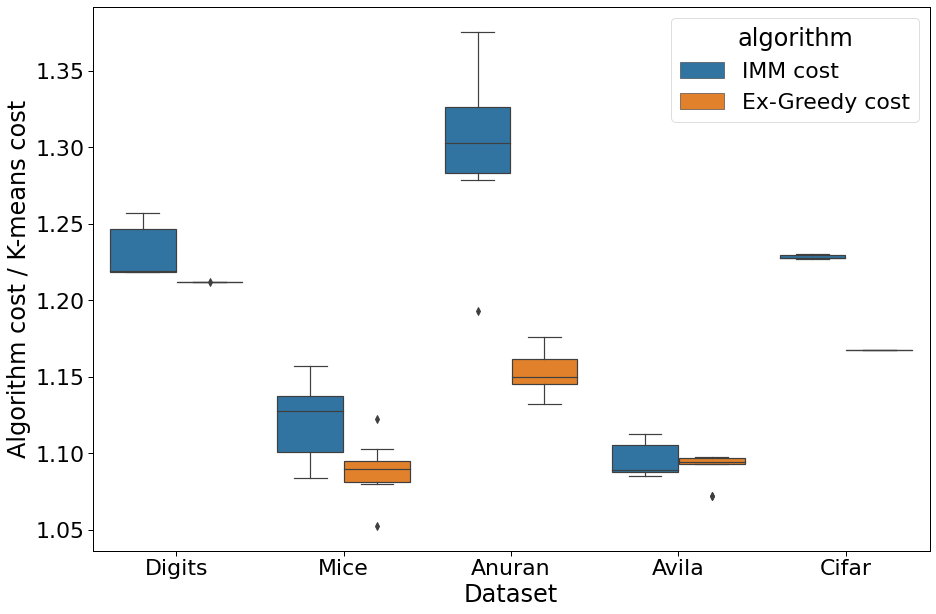

In [17]:
df_melted = pd.melt(df, id_vars=['Dataset', 'Seed'], value_vars=['IMM cost', 'Ex-Greedy cost'])
df_m1 = df_melted[df_melted.Dataset.isin(['Digits', 'Mice', 'Anuran', 'Avila', 'Cifar'])]
sns.set_context("paper", font_scale=2.5)  
fig, ax = plt.subplots(1,1, figsize=[15,10])
g = sns.boxplot(data=df_m1, x='Dataset', y='value', hue='variable', ax=ax);
plt.legend(title='algorithm')
#ax.set_title("Comparison with unrestricted K-means solution: IMM vs Ex-Greedy");
ax.set_ylabel("Algorithm cost / K-means cost");